In [6]:
import pandas as pd
from pathlib import Path

# Directory containing gene files
data_dir = Path("D:/final project/project work/syngo/New folder")

# Mapping filenames to disease names (modify if filenames differ)
file_map = {
    "ADEM": "adem_gene_symbols_filtered.txt",
    "ALS": "als_gene_symbols_filtered.txt",
    "Epilepsy": "epilepsy_gene_symbols_filtered.txt",
    "GBS": "gbs_gene_symbols_filtered.txt",
    "MG": "mg_gene_symbols_filtered.txt",
    "MS": "ms_gene_symbols_filtered.txt"
}

# Read gene sets from files
gene_dict = {}
for disease, fname in file_map.items():
    with open(data_dir / fname, "r") as f:
        genes = {line.strip() for line in f if line.strip()}
        gene_dict[disease] = genes

# Build unified gene list
all_genes = sorted(set.union(*gene_dict.values()))

# Create binary presence matrix
df = pd.DataFrame(index=all_genes)
for disease, genes in gene_dict.items():
    df[disease] = [1 if gene in genes else 0 for gene in df.index]
df.head(10)


,ADEM,ALS,Epilepsy,GBS,MG,MS
ABCA7,1,1,1,1,0,0
ABL2,1,1,0,0,1,1
ACSF3,0,0,1,0,0,0
AFF1,0,0,0,0,1,0
AGAP10P,0,0,0,0,1,0
AMIGO1,1,0,1,1,0,0
ANAPC4,0,0,0,0,1,0
ANKRD34B,0,1,1,0,0,0
ARHGAP45,1,1,1,1,0,0
ARNT2-DT,0,1,0,1,0,0


C:\Users\priya\AppData\Local\Programs\Python\Python312\Lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
C:\Users\priya\AppData\Local\Programs\Python\Python312\Lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

<Figure size 1200x800 with 0 Axes>

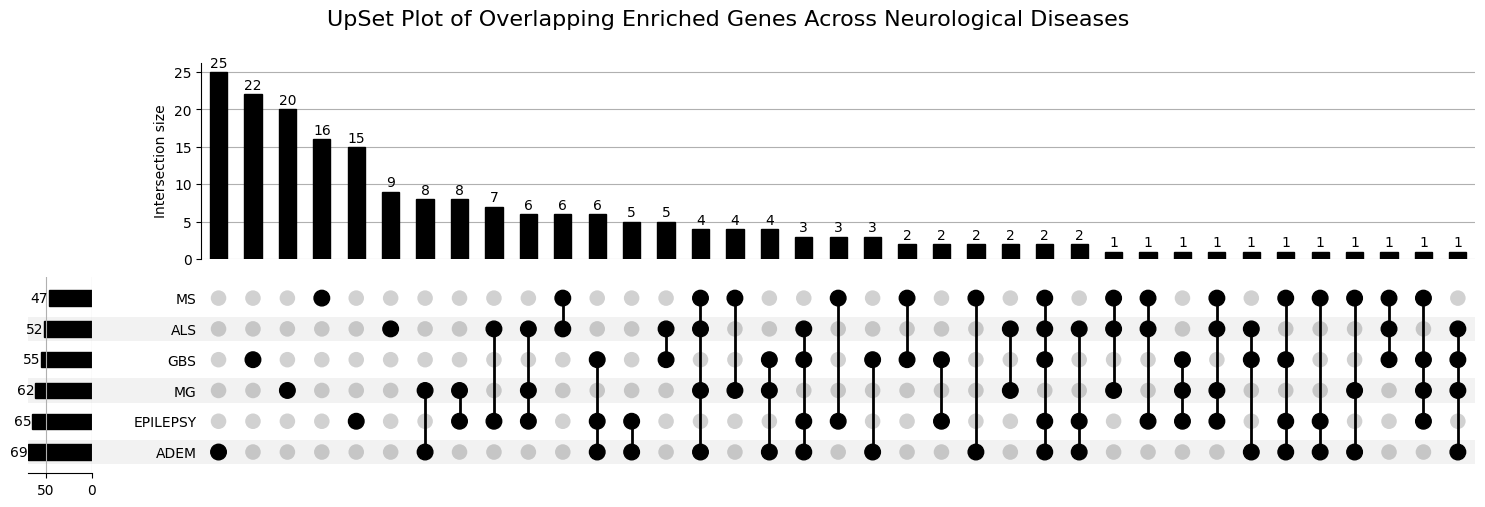

In [13]:
from upsetplot import UpSet, from_indicators
import matplotlib.pyplot as plt

# Convert to UpSet format
upset_data = from_indicators(df.columns, df)

# Create figure and plot
plt.figure(figsize=(12, 8))
UpSet(upset_data, show_counts=True, sort_by='cardinality').plot()

# Add title
plt.suptitle("UpSet Plot of Overlapping Enriched Genes Across Neurological Diseases", fontsize=16)

# Save the figure (change the filename and format as needed)
plt.savefig("upset_plot_neuro_diseases.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [8]:
import pandas as pd
import os
from functools import reduce

# Set path where your gene files are stored
folder_path = r"D:\final project\project work\syngo\New folder"

# Initialize dictionary to store genes per disease
disease_genes = {}

# Read all gene files
for file in os.listdir(folder_path):
    if file.endswith(".txt"):
        disease = file.split("_")[0].upper()  # Extract disease name
        with open(os.path.join(folder_path, file)) as f:
            genes = [line.strip() for line in f if line.strip()]
            disease_genes[disease] = set(genes)

# Create unified gene list
all_genes = sorted(set.union(*disease_genes.values()))

# Build boolean matrix: rows = genes, columns = diseases
df = pd.DataFrame(index=all_genes)

for disease, genes in disease_genes.items():
    df[disease] = df.index.isin(genes)

# Preview
print(df.head())


          ADEM    ALS  EPILEPSY    GBS     MG     MS
ABCA7     True   True      True   True  False  False
ABL2      True   True     False  False   True   True
ACSF3    False  False      True  False  False  False
AFF1     False  False     False  False   True  False
AGAP10P  False  False     False  False   True  False
